# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?&units=metric&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" +  city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | ngukurr
City not found. Skipping...
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | pevek
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | klaksvik
Processing Record 9 of Set 1 | husavik
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | coihaique
Processing Record 12 of Set 1 | tual
Processing Record 13 of Set 1 | sao sebastiao
Processing Record 14 of Set 1 | walvis bay
Processing Record 15 of Set 1 | grand-santi
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | monrovia
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | laguna
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | barga
Processing Record 23 of Set 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,26.73,81,100,6.80,PF,1678335721
1,albany,42.6001,-73.9662,-0.99,70,57,6.26,US,1678335661
2,busselton,-33.6500,115.3333,26.04,45,0,3.05,AU,1678335722
3,pevek,69.7008,170.3133,-25.25,91,84,1.17,RU,1678335723
4,hermanus,-34.4187,19.2345,17.33,77,2,5.59,ZA,1678335723


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,26.73,81,100,6.80,PF,1678335721
1,albany,42.6001,-73.9662,-0.99,70,57,6.26,US,1678335661
2,busselton,-33.6500,115.3333,26.04,45,0,3.05,AU,1678335722
3,pevek,69.7008,170.3133,-25.25,91,84,1.17,RU,1678335723
4,hermanus,-34.4187,19.2345,17.33,77,2,5.59,ZA,1678335723


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

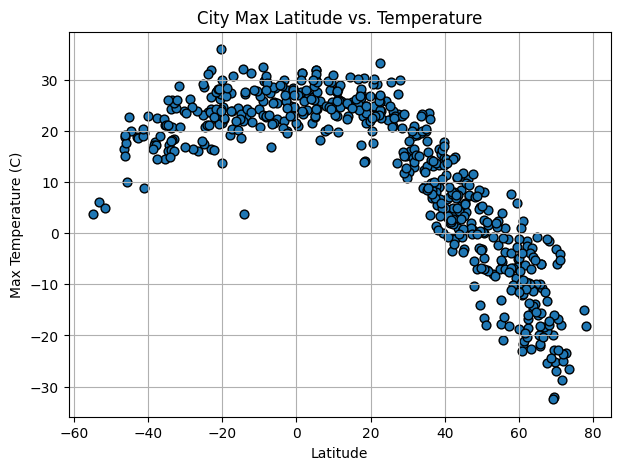

In [12]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat', y='Max Temp', marker='o', s=40, edgecolors='black', facecolor='blue', figsize=(7,5))

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature")
plt.grid()

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

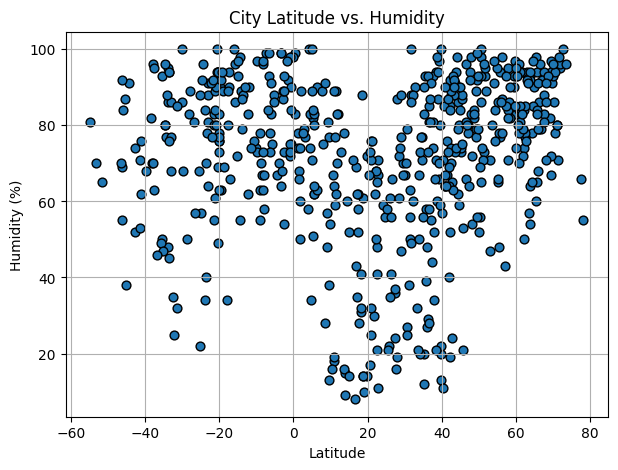

In [13]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', s=40, edgecolors='black', facecolor='blue', figsize=(7,5))

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid()

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

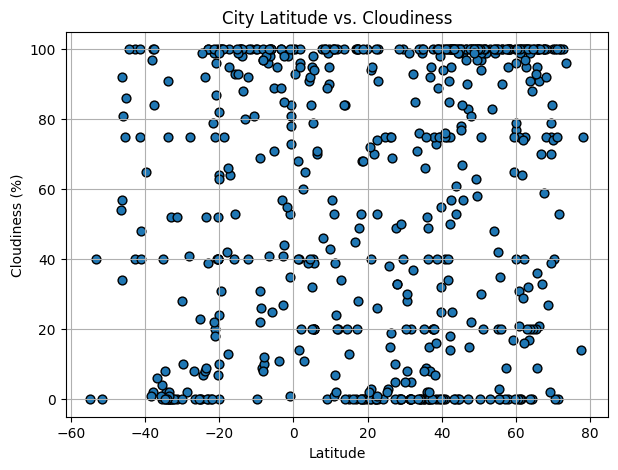

In [14]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', s=40, edgecolors='black', facecolor='blue', figsize=(7,5))

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

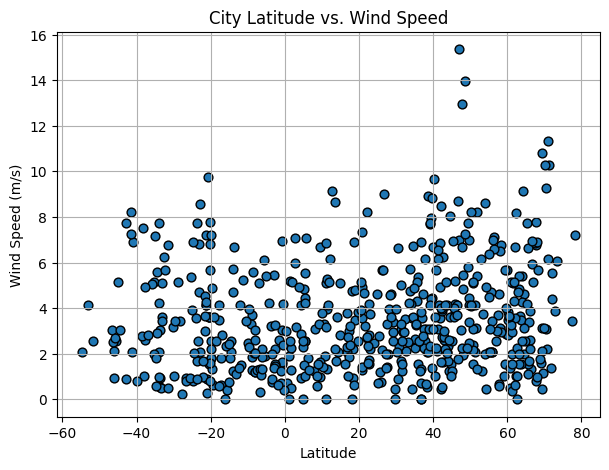

In [15]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', s=40, edgecolors='black', facecolor='blue', figsize=(7,5))

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def lin_reg_plot(data, x, y, x_label, y_label, title, fig_num, x_ann=0, y_ann=0):
    # Calculates regression and outputs values to variables
    slope, intercept, r_val, p_val, std_err = linregress(data[x], data[y])
    
    # Prints the r value
    print(f"The r-value is: {r_val}")
    
    # Calculates the regression line
    regress_values = data[x] * slope + intercept
    # Sets up a string with the line equation for plotting
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    
    # Plots the data
    plt.scatter(x=data[x], y=data[y], marker='o', s=40, color='blue', alpha=0.7)

    # Incorporates the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Plots the regression line
    plt.plot(data[x], regress_values, 'r-')
    # Annotates the plot with the equation of the regression line
    plt.annotate(line_eq,(x_ann,y_ann),fontsize=12,color="red", annotation_clip=False)  
    
    # Saves the figure to a png file and puts it into the output data file
    plt.savefig(f"Fig{fig_num}.png")

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
nh_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
nh_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,-0.99,70,57,6.26,US,1678335661
3,pevek,69.7008,170.3133,-25.25,91,84,1.17,RU,1678335723
6,klaksvik,62.2266,-6.5890,-1.49,50,100,8.18,FO,1678335724
7,husavik,66.0449,-17.3389,-6.06,68,100,3.86,IS,1678335725
13,grand-santi,4.2500,-54.3833,21.67,100,91,0.93,GF,1678335727


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
sh_df = city_data_df.loc[city_data_df['Lat'] < 0]


# Display sample data
sh_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,26.73,81,100,6.80,PF,1678335721
2,busselton,-33.6500,115.3333,26.04,45,0,3.05,AU,1678335722
4,hermanus,-34.4187,19.2345,17.33,77,2,5.59,ZA,1678335723
5,east london,-33.0153,27.9116,18.52,77,0,3.60,ZA,1678335724
8,mataura,-46.1927,168.8643,18.83,69,57,2.10,NZ,1678335725


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.9149514991377029


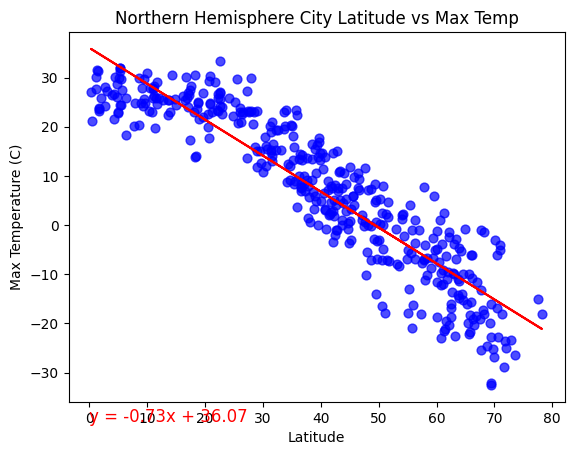

In [24]:
# Linear regression on Northern Hemisphere
lin_reg_plot(nh_df, 'Lat', 'Max Temp', "Latitude", "Max Temperature (C)", "Northern Hemisphere City Latitude vs Max Temp", 5, 0, -40)

The r-value is: 0.5519081678110362


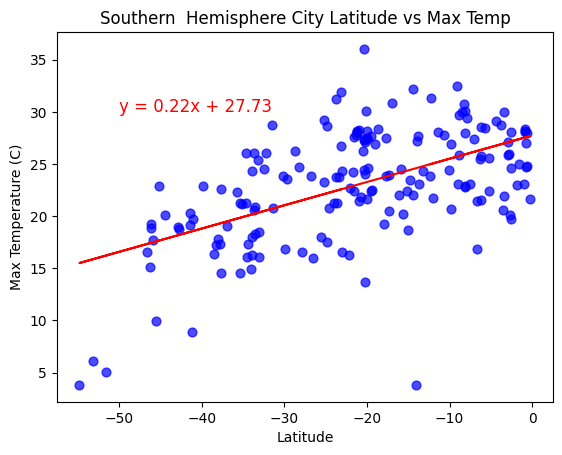

In [25]:
# Linear regression on Southern Hemisphere
lin_reg_plot(sh_df, 'Lat', 'Max Temp', "Latitude", "Max Temperature (C)", "Southern  Hemisphere City Latitude vs Max Temp", 6, -50, 30)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4041836983597983


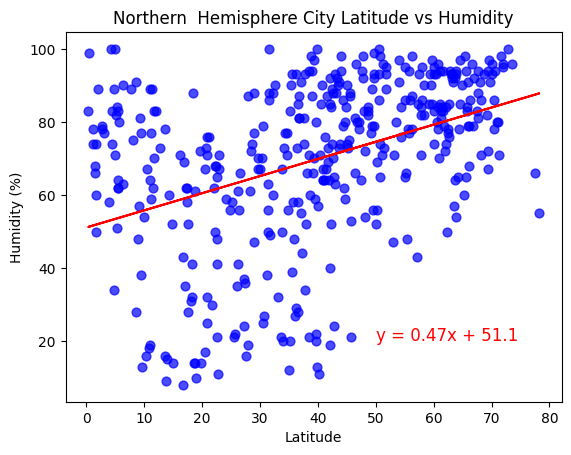

In [26]:
# Northern Hemisphere
lin_reg_plot(nh_df, 'Lat', 'Humidity', "Latitude", "Humidity (%)", "Northern  Hemisphere City Latitude vs Humidity", 7, 50, 20)

The r-value is: 0.5519081678110362


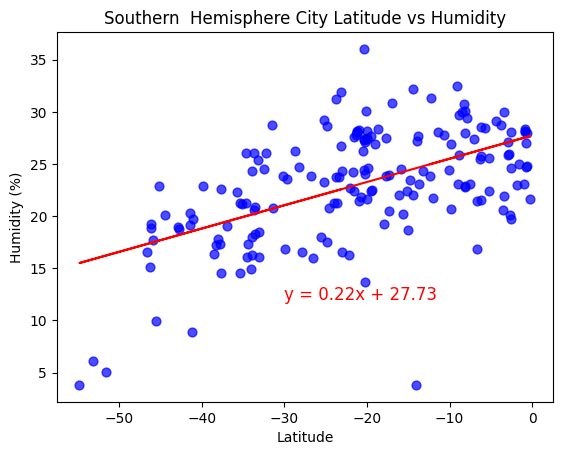

In [27]:
# Southern Hemisphere
lin_reg_plot(sh_df, 'Lat', 'Max Temp', "Latitude", "Humidity (%)", "Southern  Hemisphere City Latitude vs Humidity", 8, -30, 12)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.18142778376875646


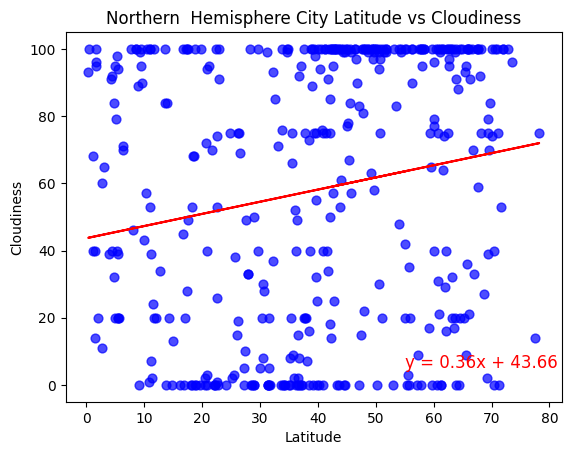

In [28]:
# Northern Hemisphere
lin_reg_plot(nh_df, 'Lat', 'Cloudiness', "Latitude", "Cloudiness", "Northern  Hemisphere City Latitude vs Cloudiness", 9, 55, 5)

The r-value is: 0.31134841778641226


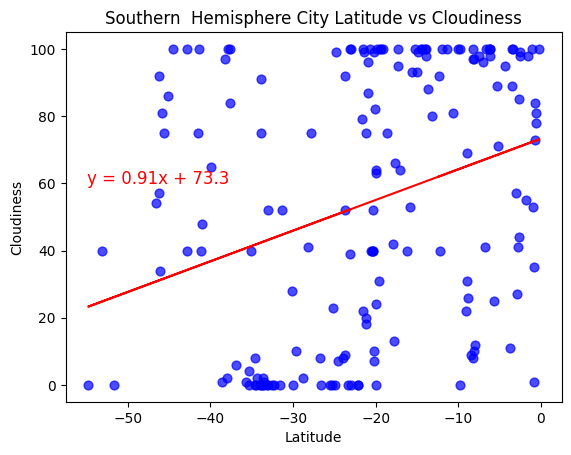

In [29]:
# Southern Hemisphere
lin_reg_plot(sh_df, 'Lat', 'Cloudiness', "Latitude", "Cloudiness", "Southern  Hemisphere City Latitude vs Cloudiness", 10, -55, 60)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.17514575780723005


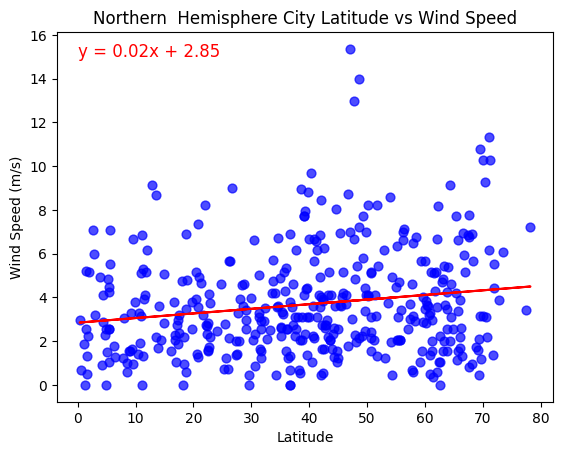

In [30]:
# Northern Hemisphere
lin_reg_plot(nh_df, 'Lat', 'Wind Speed', "Latitude", "Wind Speed (m/s)", "Northern  Hemisphere City Latitude vs Wind Speed", 11, 0, 15)

The r-value is: -0.18094618949699434


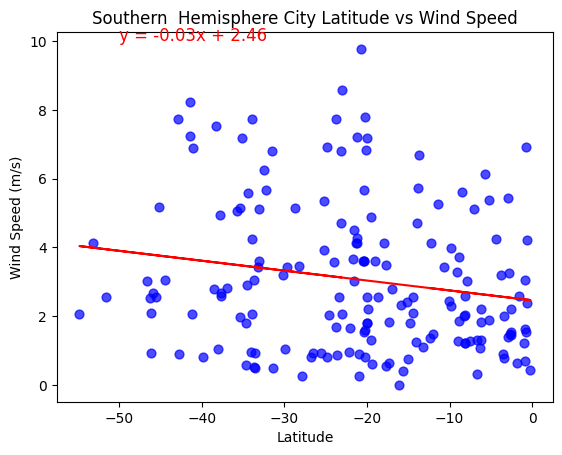

In [31]:
# Southern Hemisphere
lin_reg_plot(sh_df, 'Lat', 'Wind Speed', "Latitude", "Wind Speed (m/s)", "Southern  Hemisphere City Latitude vs Wind Speed", 12, -50, 10)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
r value for northern hem is 0.18 and -0.18 for southern hem and shows that the wind speeds are not correlated with longitude.